<a href="https://colab.research.google.com/github/hyuntaedo/FastCampus_DataMining_Problem/blob/main/Chapter_3_%EC%9A%B0%EB%A6%AC%EB%82%98%EB%9D%BC%EC%9D%98_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98%EB%8A%94_%EB%AA%87_%EC%9C%84__%EC%95%84%EB%8B%88%2C_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98%EA%B0%80_%EB%8F%84%EB%8C%80%EC%B2%B4_%EB%AD%94%EB%8D%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 우리나라의 행복지수는 몇 위? 아니, 행복지수가 도대체 뭔데?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 World Happiness Report up to 2020을 사용합니다.
    
    - 다음 6개의 csv 파일을 사용합니다.
    2015.csv
    2016.csv
    2017.csv
    2018.csv
    2019.csv
    2020.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Country: 국가
    Region: 국가의 지역
    Happiness Rank: 행복지수 순위
    Happiness Score: 행복지수 점수
    GDP per capita: 1인당 GDP
    Healthy Life Expectancy: 건강 기대수명
    Social support: 사회적 지원
    Freedom to make life choices: 삶에 대한 선택의 자유
    Generosity: 관용
    Corruption Perception: 부정부패
    Dystopia + Residual: 그 외

    
- 데이터 출처: https://www.kaggle.com/mathurinache/world-happiness-report

## 최종 목표
    - 전문가에 의해 작성된 데이터 분석해보기
    - 시간적으로 변하는 데이터의 Plot 방법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 행복지수 데이터에 대하여

### 전문가에 의해 작성된 데이터
 - 샘플링 데이터를 쓴다(모집단) 모집단에서 샘플링을 하여, 랜덤하게 뽑는것이다.
 - 랜덤하게 뽑힌 사람들한테 설문조사를 하고 샘플링된 집단의 데이터를 가지고 적절한 통계처리를 하여 전체 집단에대해서 했을 경우, 어떠한 평균이 나오며, 평균이 신뢰도(95%구간)을 계산해서 결과를 나타낸다
 - 샘플링을 잘 해야함(전체 모집단에서 전체에 대해서 소수만 해가지고 추측하는것은 알 수 없다.)
 - 각각의 bias를 가지고있는데 이것으로 통계를 낼 순 없다.
 

### 행복지수 점수의 구성에 대하여


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d mathurinache/world-happiness-report
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/53.9k [00:00<?, ?B/s]
100% 53.9k/53.9k [00:00<00:00, 45.6MB/s]
Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = dict()
df['2015'] = pd.read_csv('2015.csv')
df['2016'] = pd.read_csv('2016.csv')
df['2017'] = pd.read_csv('2017.csv')
df['2018'] = pd.read_csv('2018.csv')
df['2019'] = pd.read_csv('2019.csv')
df['2020'] = pd.read_csv('2020.csv')

## Step 2. 데이터프레임 구성하기


- 데이터 프레임의 각자의 상태가 다름
- 그러므로 다른컬럼을 같은 컬럼으로 만들어야함

### 문제 4. 년도별 데이터 표준화하기


In [21]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [43]:
# 각 년도별로 다른 정보를 가진 데이터 프레임의 Column을 동일하게 표준화하기
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust', 'residual']

In [23]:
df['2015'].drop(['Region', 'Happiness Rank','Standard Error'],axis=1,inplace=True) # generosity,trust 순서반대

In [24]:
df['2016'].drop(['Region', 'Happiness Rank','Lower Confidence Interval','Upper Confidence Interval'],axis=1,inplace=True)# generosity,trust 순서반대

In [25]:
df['2017'].drop(['Happiness.Rank', 'Whisker.high','Whisker.low'],axis=1,inplace=True) 

In [26]:
df['2018'].drop(['Overall rank'],axis=1,inplace=True) 

In [27]:
df['2019'].drop(['Overall rank'],axis=1,inplace=True)

In [31]:
df['2020'].drop(['Regional indicator','Standard error of ladder score', 'upperwhisker', 
                  'lowerwhisker','Logged GDP per capita', 'Social support', 
                  'Healthy life expectancy','Freedom to make life choices', 
                  'Generosity', 'Perceptions of corruption','Ladder score in Dystopia'],axis=1,inplace=True) 

In [32]:
df['2018'].head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [33]:
df['2018'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [35]:
df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

0      5.047
1      5.211
2      5.184
3      5.069
4      5.169
       ...  
151    2.249
152    2.675
153    1.564
154    0.595
155    1.153
Length: 156, dtype: float64

In [36]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)
df['2019']['residual'] = df['2019']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

In [38]:
df['2018']

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,residual
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318
...,...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,1.106
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,0.628
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,1.690
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2.488


In [39]:
df['2019']

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,residual
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.722
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.389
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.370
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.425
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.319
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1.085
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0.556
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.639
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.488


In [42]:
df['2015'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [44]:
df['2016'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [46]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]
df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]

In [49]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life 

In [50]:
for col_name in df:
    df[col_name].columns = cols

In [51]:
df['2015']

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176
...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,0.67042
154,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328
155,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,0.32858
156,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,1.83302


In [52]:
df['2016']

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596
...,...,...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681,2.10812
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,2.14558
154,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587,2.13540
155,Syria,3.069,0.74719,0.14866,0.62994,0.06912,0.48397,0.17233,0.81789


In [53]:
df['2017']

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...
150,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [54]:
df['2018']

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318
...,...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,1.106
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,0.628
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,1.690
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2.488


In [55]:
df['2019']

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.722
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.389
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.370
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.425
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.319
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1.085
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0.556
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.639
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.488


In [56]:
df['2020']

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


### 문제 5. 하나의 데이터프레임으로 합치기


In [63]:
# 아래 셀과 동일한 데이터프레임으로 결합하기
df_all = pd.concat(df,axis=0)
df_all.index.names = ['year','rank']
df_all

country   score  ...     trust  residual
year rank                                    ...                    
2015 0                  Switzerland  7.5870  ...  0.419780  2.517380
     1                      Iceland  7.5610  ...  0.141450  2.702010
     2                      Denmark  7.5270  ...  0.483570  2.492040
     3                       Norway  7.5220  ...  0.365030  2.465310
     4                       Canada  7.4270  ...  0.329570  2.451760
...                             ...     ...  ...       ...       ...
2020 148   Central African Republic  3.4759  ...  0.028265  2.860198
     149                     Rwanda  3.3123  ...  0.485542  0.548445
     150                   Zimbabwe  3.2992  ...  0.080929  0.841031
     151                South Sudan  2.8166  ...  0.111157  1.378751
     152                Afghanistan  2.5669  ...  0.001226  1.507236

[935 rows x 9 columns]

In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 6. 원하는 형태로 데이터프레임 정리하기

In [64]:
# 아래 셀과 동일한 데이터프레임으로 변형하기
df_all.reset_index(inplace=True)
df_all['rank'] +=1
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 7. Pivot을 이용하여 데이터프레임 재구성하기

In [75]:
# 아래 셀과 동일한 데이터프레임 구성하기
# Hint) DataFrame의 pivot() 메소드 활용
rank_table = df_all.pivot(index='country',columns=['year'],values='rank')
rank_table.sort_values('2020',inplace=True)
rank_table.head(20)

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0
Austria,13.0,12.0,13.0,12.0,10.0,9.0


In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

## Step 3. 데이터 시각화 수행하기

### 문제 8. 년도별 순위 변화 시각화하기

In [89]:
rank_table.max()

year
2015    158.0
2016    157.0
2017    155.0
2018    156.0
2019    156.0
2020    153.0
dtype: float64

In [90]:
rank_table.max().max()

158.0

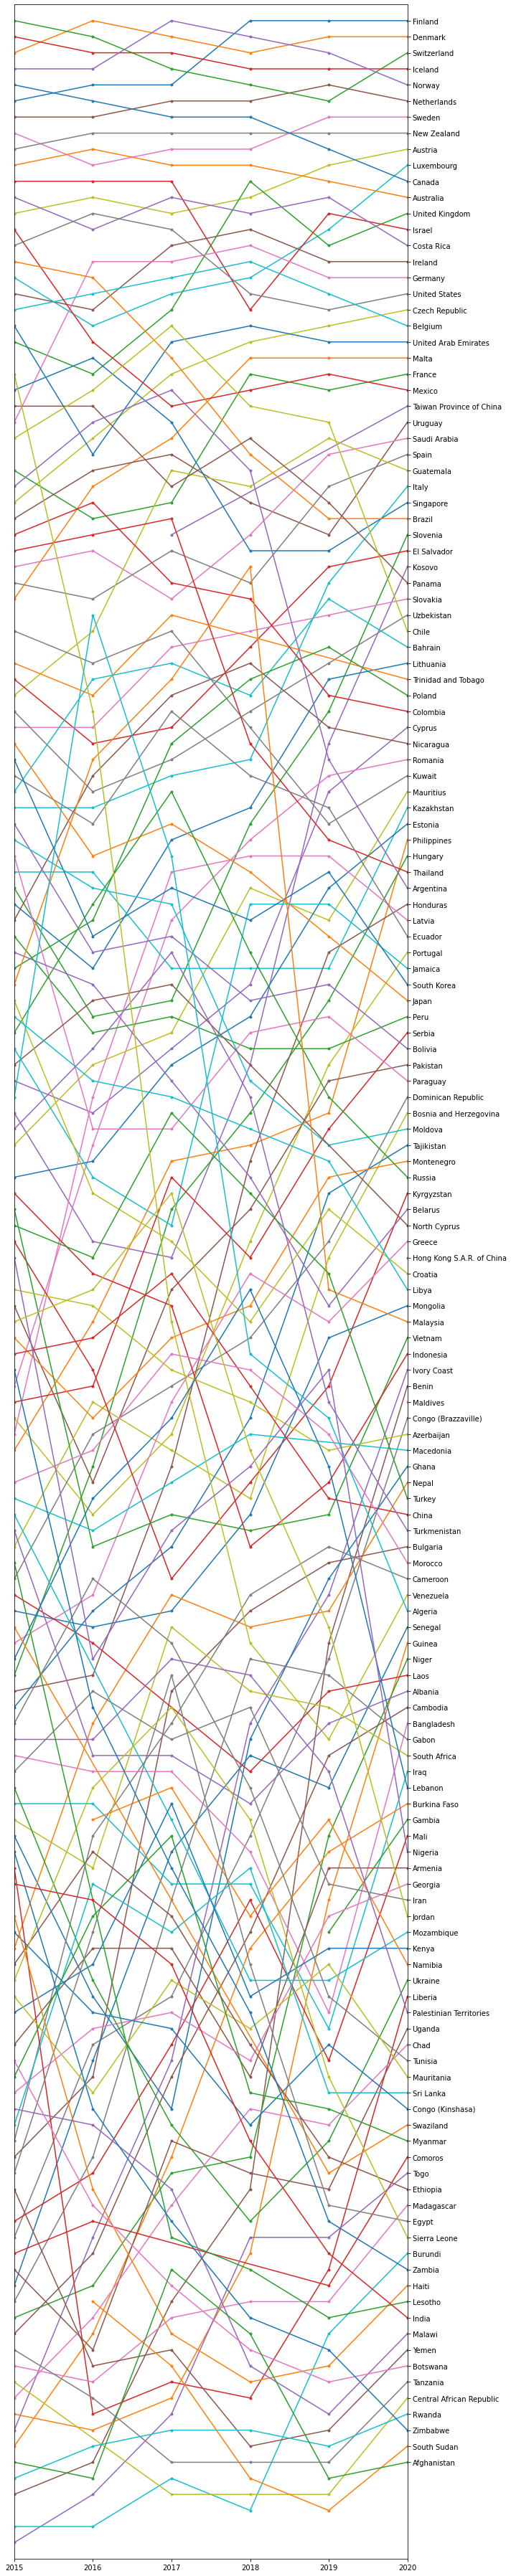

In [98]:
# 아래 셀과 동일하게 년도별 순위 변화를 시각화하기
# Hint) plt.plot을 이용하고, 필요한 경우 데이터프레임을 변형하면서 그리시오.
fig = plt.figure(figsize=[10,50])
rank_2020 = rank_table['2020'].dropna()
for cntry in rank_table['2020'].dropna().index:
    t = rank_table.loc[cntry].dropna()
    plt.plot(t.index,t,'.-')
plt.xlim(['2015','2020'])
plt.ylim([0,rank_table.max().max()+1])
plt.yticks(rank_2020,rank_2020.index)
ax = plt.gca()
ax.invert_yaxis()
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.tight_layout()
plt.show()

In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 9. 분야별로 나누어 점수 시각화하기

In [99]:
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [108]:
# sns.barplot()을 이용하여 아래 셀과 동일하게 시각화하기
# Hint) 필요에 따라 데이터프레임을 수정하여 사용하시오. 적절한 수정을 위해 누적합(pd.cumsum())을 활용하시오.
data = df_all[df_all['year'] == '2020']
data = data.loc[data.index[:20]]
d = data[data.columns[4:]].cumsum(axis=1)
d = d[d.columns[::-1]]
d['country'] = data['country']
d


,residual,trust,generosity,freedom,health,family,economy,country
782,7.808666,5.045831,4.567974,4.408304,3.745987,2.784715,1.285190,Finland
783,7.645565,5.212824,4.717564,4.474770,3.809730,2.830398,1.326949,Denmark
784,7.559934,5.209667,4.801721,4.532665,3.903711,2.863178,1.390774,Switzerland
785,7.504452,5.043764,4.899223,4.536893,3.874913,2.874069,1.326502,Iceland
786,7.488005,5.319738,4.885638,4.597653,3.927452,2.919380,1.424207,Norway
787,7.448898,5.096781,4.728212,4.391894,3.778268,2.802592,1.338946,Netherlands
788,7.353545,5.107245,4.665179,4.392351,3.742053,2.755583,1.322235,Sweden
789,7.299567,5.171459,4.710191,4.384465,3.737675,2.729536,1.242318,New Zealand
790,7.294245,4.895799,4.614543,4.359033,3.755664,2.754730,1.317286,Austria
791,7.237480,5.083780,4.716738,4.520784,3.910647,2.924204,1.536676,Luxembourg


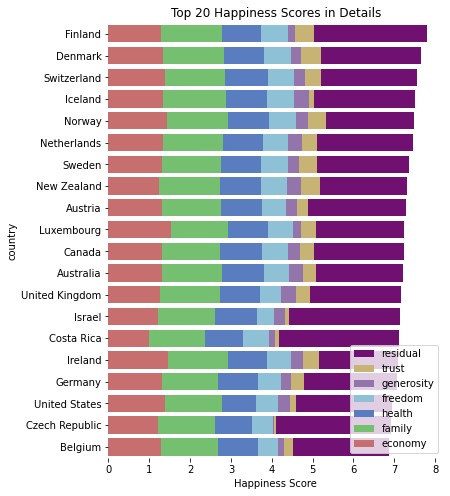

In [124]:
sns.set_color_codes('muted')
colors = ['r','g','b','c','m','y','purple'][::-1]
plt.figure(figsize=[6,8])
for idx,c in enumerate(d.columns[:-1]):
    sns.barplot(x=c,y='country',data=d,label=c,color=colors[idx])
plt.legend(loc='lower right')
plt.title('Top 20 Happiness Scores in Details')
plt.xlabel('Happiness Score')
sns.despine(left=True,bottom=True)

In [ ]:
# 이 셀의 출력 내용이 사라지지 않게 조심하세요.

### 문제 10. Column간의 상관성 시각화하기

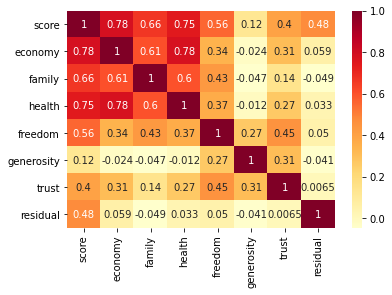

In [128]:
# 상관성 Heatmap, Pairplot 등으로 상관성을 시각화하기
sns.heatmap(df_all.drop('rank',axis=1).corr(),annot=True,cmap='YlOrRd')

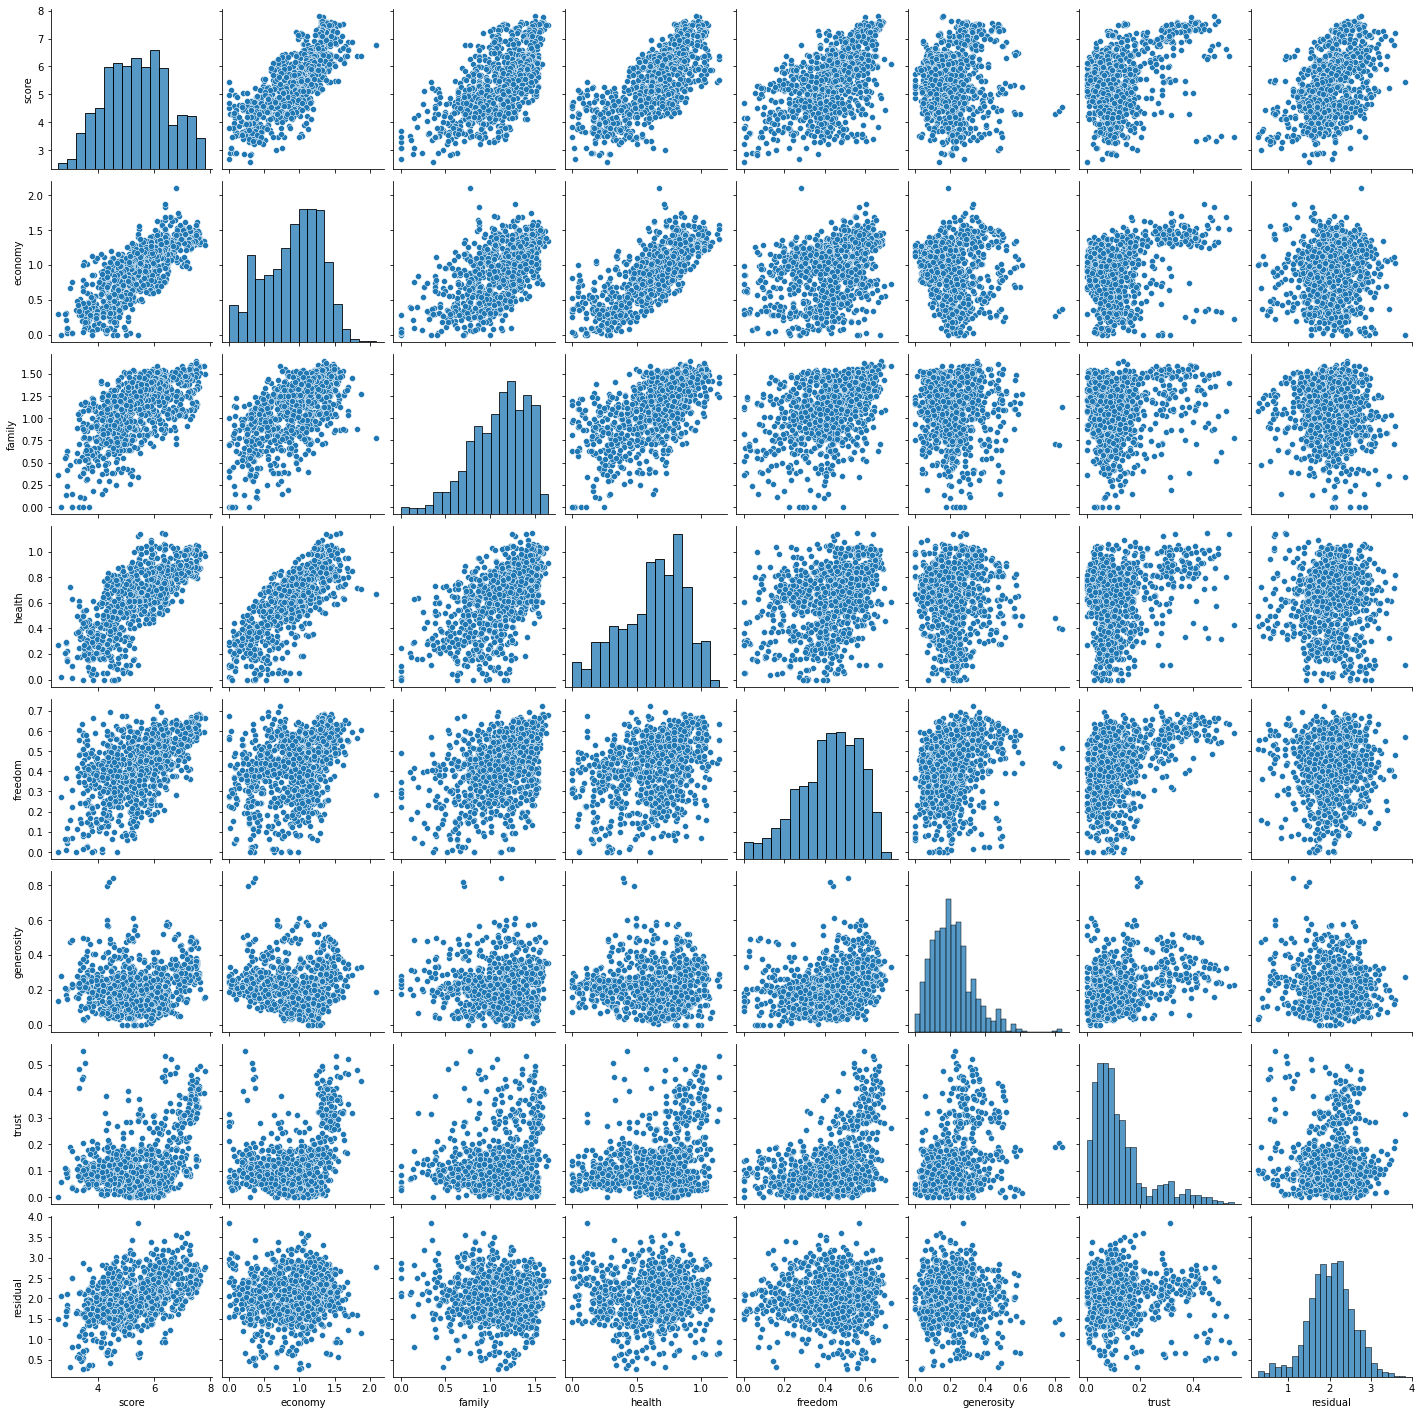

In [130]:
sns.pairplot(df_all.drop('rank',axis=1))

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. 모델의 입력과 출력 정의하기

In [131]:
# 학습할 모델의 입출력을 정의하시오. Column의 의미를 고려하여 선정하시오.
col_input_list = ['economy','family','health','freedom','generosity','trust']
col_out = 'score'

### 문제 12. 학습데이터와 테스트데이터 분리하기


In [138]:
# 2015년 ~ 2019년도 데이터를 학습 데이터로, 2020년도 데이터를 테스트 데이터로 분리하기
df_train = df_all[df_all['year'] != '2020']
df_test = df_all[df_all['year'] == '2020']

X_train = df_train[col_input_list]
y_train = df_train[col_out]
X_test = df_test[col_input_list]
y_test = df_test[col_out]

### 문제 13. StandardScaler를 이용해 학습 데이터 표준화하기


In [133]:
from sklearn.preprocessing import StandardScaler

In [139]:
# StandardScaler를 이용해 학습 데이터를 표준화하기
scaler = StandardScaler()
scaler.fit(X_train)

X_norm = scaler.transform(X_train)
X_train = pd.DataFrame(X_norm,index=X_train.index,columns=X_train.columns)

X_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_norm,index=X_test.index,columns=X_test.columns)

## Step 5. Regression 모델 학습하기

### 문제 14. Linear Regression 모델 학습하기

In [144]:
X_train.isna().sum()
X_test.isna().sum()

economy       0
family        0
health        0
freedom       0
generosity    0
trust         0
dtype: int64

In [148]:
X_train.fillna(0,inplace=True)

In [140]:
from sklearn.linear_model import LinearRegression

In [149]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 15. 모델 학습 결과 평가하기

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [151]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_lr.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(sqrt(mean_squared_error(y_test,pred)))

0.4411766043832984
0.5666831855845988


### 문제 16. XGBoost Regression 모델 학습하기

In [152]:
from xgboost import XGBRegressor

In [153]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)

[13:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 17. 모델 학습 결과 평가하기

In [154]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_xgb.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(sqrt(mean_squared_error(y_test,pred)))

0.4008115506377966
0.5032488531532971


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 18. 실제 값과 추측 값의 Scatter plot 시각화하기


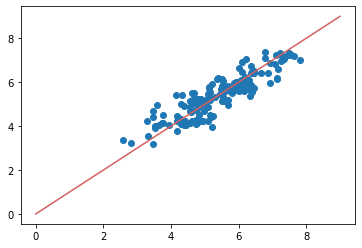

In [155]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(x=y_test,y=pred)
plt.plot([0,9],[0,9],'r-')
plt.show()

### 문제 19. LinearRegression 모델의 Coefficient 시각화하기


<BarContainer object of 6 artists>

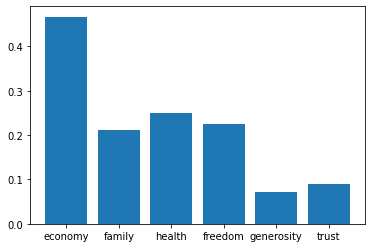

In [158]:
# model_lr.coef_ 시각화하기
plt.bar(X_train.columns,model_lr.coef_)

### 문제 20. XGBoost 모델의 Feature Importance 시각화하기


<BarContainer object of 6 artists>

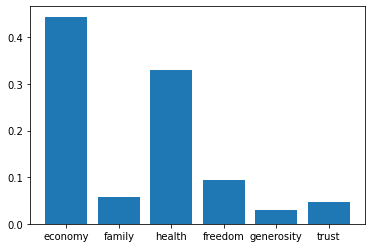

In [159]:
# model_xgb.feature_importance_ 시각화하기
plt.bar(X_train.columns,model_xgb.feature_importances_)